In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Import data

In [2]:
dataFile = 'ex2data1.txt'
matrix = np.loadtxt(dataFile, delimiter=',')
scores = matrix[:, :2]
result = matrix[:, -1]
print(scores.shape)
print(result.shape)

(100, 2)
(100,)


## Plotting

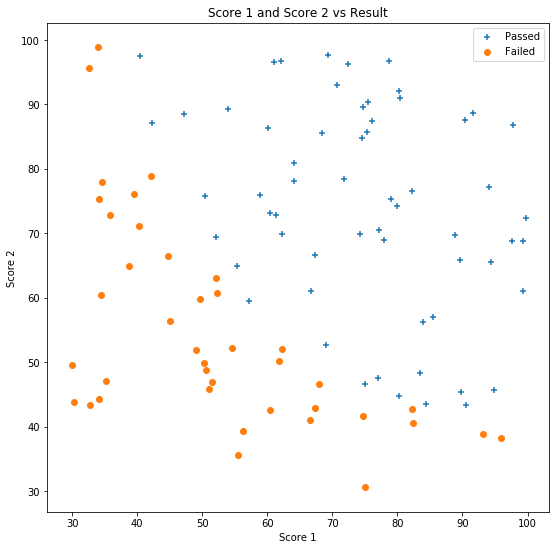

In [3]:
positive = matrix[:, -1] == 1
negative = matrix[:, -1] == 0

plt.figure(figsize=(9, 9))
plt.scatter(matrix[positive, 0], matrix[positive, 1], marker='+', label='Passed')
plt.scatter(matrix[negative, 0], matrix[negative, 1], marker='o', label='Failed')
plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.title('Score 1 and Score 2 vs Result')
plt.legend()

In [4]:
## Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
def sigmoid_inverse(z):
    return np.log(z/(1-z))

In [6]:
## Testing Sigmoid on scalars
print('sigmoid(0) ', sigmoid(0))
print('sigmoid(10)', sigmoid(10))
print('sigmoid(-10)', sigmoid(-10))

## Testing sigmoid on np arrays
print('On zeros 2 x 2 array: ', sigmoid(np.zeros((2, 2))))

sigmoid(0)  0.5
sigmoid(10) 0.9999546021312976
sigmoid(-10) 4.5397868702434395e-05
On zeros 2 x 2 array:  [[0.5 0.5]
 [0.5 0.5]]


In [7]:
# required for reconciling the matrix form and the form in which scipy.optimize.minimize expects input
def reshape_theta(theta):
    shape = len(theta.shape)
    num_features = theta.shape[0]
    if (shape == 1):
        theta = theta.reshape((num_features, 1))
    return theta

In [8]:
def hypothesis(theta, trainingX):
    theta = reshape_theta(theta)
    return sigmoid(np.dot(trainingX, theta))

In [9]:
def cost_function(theta, trainingX, trainingY):
    theta = reshape_theta(theta)
    num_of_examples = trainingX.shape[0]
    return - np.sum((trainingY * np.log(hypothesis(theta, trainingX)) + (1 - trainingY) * np.log(1 - hypothesis(theta, trainingX))), axis=0) / num_of_examples

In [10]:
## Testing
cost_function(np.ones((3, 1)), np.ones((4, 3)), np.ones((4, 1)))[0]

0.04858735157374191

In [11]:
def gradient(theta, trainingX, trainingY):
    num_of_examples = trainingX.shape[0]
    theta = reshape_theta(theta)
    return np.dot(trainingX.transpose(), hypothesis(theta, trainingX) - trainingY) / num_of_examples

In [12]:
cost_function(np.ones((3, 1)), np.ones((4, 3)), np.ones((4, 1)))[0], gradient(np.ones((3, 1)), np.ones((4, 3)), np.ones((4, 1))).reshape((3))

(0.04858735157374191, array([-0.04742587, -0.04742587, -0.04742587]))

In [13]:
# this function returns the values in the form that the scipy.optimize.minimize expects
def cost_and_gradient(theta, trainingX, trainingY):
    cost = cost_function(theta, trainingX, trainingY)
    grad = gradient(theta, trainingX, trainingY)
    return cost[0], grad.reshape((trainingX.shape[1]))
    #return cost_function(theta, trainingX, trainingY)[0], gradient(theta, trainingX, trainingY).reshape((trainingX.shape[1]))

In [14]:
num_of_examples = scores.shape[0]
trainingX = np.concatenate((np.ones((num_of_examples, 1)), scores), axis=1)
trainingY = np.reshape(result, (num_of_examples, 1))
initial_theta = np.zeros((trainingX.shape[1]))

In [15]:
options = { 'maxiter': 400 }
optimizer_result = minimize(cost_and_gradient, initial_theta, args=(trainingX, trainingY), jac=True, method='TNC', options=options)

In [16]:
## Final theta
final_theta = optimizer_result['x']
final_theta

array([-25.16131857,   0.20623159,   0.20147149])

In [17]:
## mentioned in exercise that the result should be about 0.203
cost_function(final_theta, trainingX, trainingY)

array([0.2034977])

In [18]:
## again a check as against values specified in exercise for score 45 and 85
hypothesis(final_theta, np.array([[1, 45, 85]]))

array([[0.77629062]])

## Evaluating Results

### Plotting Decision Boundary

Decision boundary depends on the threshold used for mapping a probability to a class. 

- For example, if the threshold is 0.5, then the decision boundary comes to out be _X * theta > 0_. 

- If we have a stricter threshold, say 0.7, then the decision boundary will be calculated as follows:
    1. Notation: sigmoid(-1) => inverse of sigmoid
    2. _X * theta > sigmoid(-1)(threshold)_
    


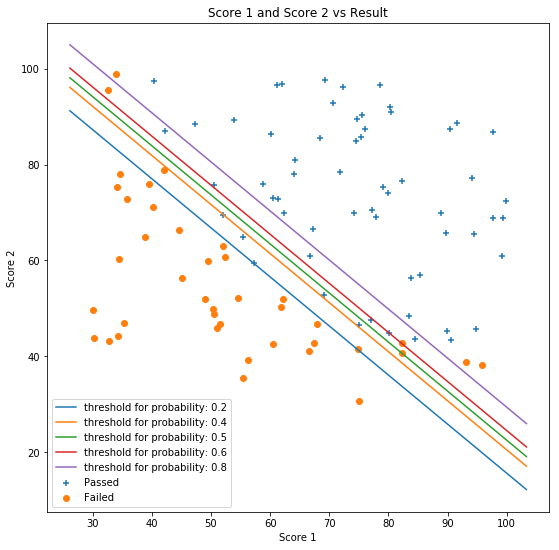

In [21]:
positive = matrix[:, -1] == 1
negative = matrix[:, -1] == 0

plt.figure(figsize=(9, 9))
plt.scatter(matrix[positive, 0], matrix[positive, 1], marker='+', label='Passed')
plt.scatter(matrix[negative, 0], matrix[negative, 1], marker='o', label='Failed')
plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.title('Score 1 and Score 2 vs Result')
x_vals = np.array(plt.gca().get_xlim())
thresholds = [0.2, 0.4, 0.5, 0.6, 0.8]
for threshold in thresholds:
    y_vals = - (final_theta[0] + final_theta[1] * x_vals - sigmoid_inverse(threshold)) / final_theta[2]
    plt.plot(x_vals, y_vals, label=('threshold for probability: ' + str(threshold)))
plt.legend()